### Hypothesis Tests 

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

##### Normal Distribution

In [25]:
x = np.linspace(stats.norm.ppf(0.01), stats.norm.ppf(0.99), 1000)
distribution = stats.norm.pdf(x)

Text(0.5, 1.0, 'A Normal Distribution')

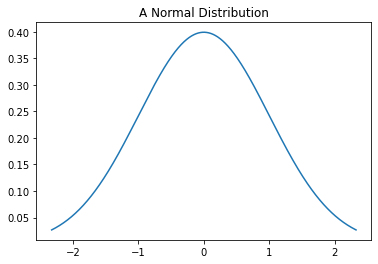

In [26]:
plt.plot(x, distribution)
plt.title('A Normal Distribution')

In [4]:
df = pd.DataFrame({'heights': distribution}, index=x)

In [5]:
#coin example
##one coin flip
np.random.binomial(1, 0.5)

0

In [6]:
np.random.binomial(1000, 0.5)/1000

0.524

In [7]:
distribution_of_flips = np.random.binomial(100, 0.5, 1000)

In [8]:
sns.distplot(distribution_of_flips, hist=False)

NameError: name 'sns' is not defined

In [ ]:
#gaussian
sns.distplot(np.random.normal(size = 1000), hist = False, label = 'Group 1')
sns.distplot(np.random.normal(loc = 0.75, size = 1000), hist = False, label = 'Group 2')

#### Hypothesis Tests

- What's the distribution that I'm imagining -- here it's a normal with mean 0.  
- p-value: 0.001

In [ ]:
#1-sample t-test
#test if mean is likely equal to some value
stats.ttest_1samp(df['heights'], 0)

In [ ]:
g1 = np.random.normal(size = 1000)
g2 = np.random.normal(loc = 0.75, size = 1000)

In [16]:
np.random.normal(loc = 5, scale=100, size = 1000)

array([ -48.14136761,   48.83329042,  -55.79734865,  -19.05464578,
         65.4309395 ,  166.63665363,   98.69789888,  -83.92197007,
        -50.8976484 ,  -33.64005187,  218.77673486,  108.94069934,
        -18.54972049, -184.42581422,   37.5523563 ,   90.47820592,
        132.67432789,    6.8138083 ,    5.00409739,   66.53371757,
       -113.11353749,   79.23138778,  -68.57314867,  -66.74967482,
        -26.06072773,    7.71234231,   78.29651735,   54.36353747,
         -7.0911379 , -281.09309625,  124.54616039,  -27.55827793,
        -31.08609079,  -62.24624565,  110.68502483,  231.8343287 ,
        132.90910192,  148.53232584,   91.40694618,   13.72558931,
       -224.89051569, -180.55696278,  102.8526137 ,  -23.43173334,
        -81.9196986 ,   62.90915024,   45.20673528,  -46.68897678,
          5.16940206, -259.76541534,  -62.57347236,    7.64941373,
        105.66502215,   34.31977006,   91.91395783,  105.36063948,
        -96.64277003,   78.75679604,  -62.95668163,   43.52071

In [ ]:
stats.ttest_ind(g1, g2)

In [20]:
def p_value_experiment(location):
    np.random.seed(24)
    g1 = np.random.normal(size = 1000)
    g2 = np.random.normal(loc = location, size = 1000)
    tstat, pval = stats.ttest_ind(g1, g2)
    sns.distplot(g1, hist = False, label = 'Group 1')
    sns.distplot(g2, hist = False, label = 'Group 2')
    plt.title(f'The p-value is {pval: .6f}')

In [21]:
from ipywidgets import interact
import ipywidgets as widgets

In [22]:
interact(p_value_experiment, location = widgets.FloatSlider(min = -2, max = 2, step = 0.05))

interactive(children=(FloatSlider(value=0.0, description='location', max=2.0, min=-2.0, step=0.05), Output()),…

<function __main__.p_value_experiment(location)>

In [23]:
#if not independent?
stats.ttest_rel(g1, g2)

NameError: name 'g1' is not defined

In [ ]:
stats.ttest_1samp(g1 - g2, 0)

In [ ]:
df1 = pd.DataFrame({'height': g1, 'label': ['g1' for g in g1]})
df2 = pd.DataFrame({'height': g2, 'label': ['g2' for g in g2]})

In [ ]:
df = df1.append(df2)

In [ ]:
df.head()

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
model = ols('height ~ label', df).fit()

In [ ]:
print(model.summary())

In [ ]:
stats.ttest_ind(g1, g2)